# LIBRARIES TO MANIPULATE DATA

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [5]:
qPCR = pd.read_csv('https://raw.githubusercontent.com/fabzy4L/DATA_ANALYTICS/main/GENE_EXPRESSION%20NICOTINE_R/qPCR%20all%20values%20-%20qPCR.csv')
qPCR

,SPECIES,SEX,DX,CERKL,CHRNA10,FA2H,SMYD1,CLIC4,COL4A1,FAM189A1,PTGDR,SDCCAG8,TF
0,HUMAN,M,CONTROL,3.105000,2.4950,0.239,0.381,0.881,2.280,1.119,7.722,6.570,4.593
1,HUMAN,M,NICOTINE,0.500000,0.7030,0.314,0.831,1.616,0.505,0.743,0.263,2.092,0.572
2,HUMAN,M,CONTROL,1.891000,1.5140,0.212,1.414,0.601,0.908,1.609,2.193,4.246,1.209
3,HUMAN,M,NICOTINE,2.850000,0.7390,0.370,3.705,1.957,5.086,0.988,1.797,3.576,0.972
4,HUMAN,M,CONTROL,0.847000,0.4600,0.155,1.791,0.457,1.688,0.769,0.633,3.409,0.382
5,HUMAN,M,NICOTINE,0.340000,1.0800,0.185,4.659,0.550,0.391,0.875,0.113,1.751,0.217
6,HUMAN,F,CONTROL,1.589000,1.4900,0.962,1.868,2.536,0.894,0.717,2.258,2.410,1.048
7,HUMAN,F,NICOTINE,0.428000,1.0690,0.876,2.905,1.531,0.509,1.033,0.771,3.009,2.533
8,HUMAN,F,CONTROL,1.526000,1.4480,0.310,1.573,0.802,0.838,1.341,1.285,4.427,0.876
9,HUMAN,F,NICOTINE,1.106000,0.9370,0.558,3.234,0.617,0.553,1.436,0.697,2.864,3.213


# REMOVE COLUMNS WITH NAN VALUES

In [6]:
qPCR_clean = qPCR.dropna(axis=1)
qPCR_clean

,SPECIES,SEX,DX,CERKL,CHRNA10,FA2H,SMYD1
0,HUMAN,M,CONTROL,3.105000,2.4950,0.239,0.381
1,HUMAN,M,NICOTINE,0.500000,0.7030,0.314,0.831
2,HUMAN,M,CONTROL,1.891000,1.5140,0.212,1.414
3,HUMAN,M,NICOTINE,2.850000,0.7390,0.370,3.705
4,HUMAN,M,CONTROL,0.847000,0.4600,0.155,1.791
5,HUMAN,M,NICOTINE,0.340000,1.0800,0.185,4.659
6,HUMAN,F,CONTROL,1.589000,1.4900,0.962,1.868
7,HUMAN,F,NICOTINE,0.428000,1.0690,0.876,2.905
8,HUMAN,F,CONTROL,1.526000,1.4480,0.310,1.573
9,HUMAN,F,NICOTINE,1.106000,0.9370,0.558,3.234


In [7]:
qPCR_clean.columns.tolist()

['SPECIES', 'SEX', 'DX', 'CERKL', 'CHRNA10', 'FA2H', 'SMYD1']

# SEPARATE DATAFRAMES PER SPECIES

In [8]:
qPCR_clean_human = qPCR_clean.iloc[0:24, 0:7]
qPCR_clean_rat = qPCR_clean.iloc[24:48, 0:7]

# CREATE VARIABLES FOR EACH COLUMN

In [9]:
SPECIES  = qPCR_clean['SPECIES']
SEX  = qPCR_clean['SEX']
DX = qPCR_clean['DX']
CERKL = qPCR_clean['CERKL']
CHRNA10 = qPCR_clean['CHRNA10']
FA2H = qPCR_clean['FA2H']
SMYD1 = qPCR_clean['SMYD1']

# NORMALITY TEST

# Create a list to store the results for each column
stdresults = []

# Iterate through the columns

    #for column_name_std in standardized_df.columns:
     column_data_std = standardized_df[column_name_std]

    # Perform the Shapiro-Wilk test for normality
    statistic_std, p_value_std = stats.shapiro(column_data_std)



------- USE THIS CODE TO CREATE A DATAFRAME WITH THE RESULTING VALUES

    # Determine normality based on the p-value
    if p_value_std <= alpha:
        normality_std = "**NOT** normally distributed"
    else:
        normality_std = "Normally Distributed"

        
    # Store the result for the current column
    stdresults.append({
        "Column Name": column_name_std,
        "Test Statistic": statistic_std,
        "P-value": p_value_std,
        "Normality": normality_std
    })

# Create a DataFrame from the results
stdresults_df = pd.DataFrame(stdresults)

# Print or save the results as needed
stdresults_df

In [10]:
# Specify the list of columns you want to test
columns_to_test = ['CERKL', 'CHRNA10', 'FA2H', 'SMYD1']

# Set the significance level
alpha = 0.05

In [11]:
humresults = []

for column_name_hum in columns_to_test:
#     if column_name_hum in qPCR_clean_human.columns:
        column_data_hum = qPCR_clean_human[column_name_hum]
        statistic_hum, p_value_hum = stats.shapiro(column_data_hum)
    
#        print(f"Shapiro-Wilk Test for {column_name_hum}:")
#        print(f"Test Statistic: {statistic_hum}")
#        print(f"P-value: {p_value_hum}")
#    
#        if p_value_hum <= alpha:
#            print("")
#            print(f"{column_name_hum} **NOT** normally distributed\n")
#    else:
#        print(f"Column {column_name_hum} not found in the dataset.\n")
        
    
        
    # Determine normality based on the p-value
        if p_value_hum <= alpha:
            normality_hum = "**NOT** normally distributed"
        else:
            normality_hum = "Normally Distributed"

        
    # Store the result for the current column
        humresults.append({
            "Column Name": column_name_hum,
            "Test Statistic": statistic_hum,
            "P-value": p_value_hum,
            "Normality": normality_hum
    })

# Create a DataFrame from the results
humresults_df = pd.DataFrame(humresults)

# Print or save the results as needed
humresults_df

,Column Name,Test Statistic,P-value,Normality
0,CERKL,0.862855,0.003823,**NOT** normally distributed
1,CHRNA10,0.885386,0.010685,**NOT** normally distributed
2,FA2H,0.806568,0.000378,**NOT** normally distributed
3,SMYD1,0.758140,0.000066,**NOT** normally distributed


In [12]:
for column_name_rat in columns_to_test:
    if column_name_rat in qPCR_clean_rat.columns:
        column_data_rat = qPCR_clean_rat[column_name_rat]
        statistic_rat, p_value_rat = stats.shapiro(column_data_rat)
    
        print(f"Shapiro-Wilk Test for {column_name_rat}:")
        print(f"Test Statistic: {statistic_rat}")
        print(f"P-value: {p_value_rat}")
    
        if p_value_rat <= alpha:
            print(f"{column_name_rat} **NOT** normally distributed.\n")
    else:
        print(f"Column {column_name_rat} not found in the dataset.\n")

Shapiro-Wilk Test for CERKL:
Test Statistic: 0.9677996039390564
P-value: 0.6130536794662476
Shapiro-Wilk Test for CHRNA10:
Test Statistic: 0.9482896327972412
P-value: 0.24871698021888733
Shapiro-Wilk Test for FA2H:
Test Statistic: 0.9651966094970703
P-value: 0.5512365102767944
Shapiro-Wilk Test for SMYD1:
Test Statistic: 0.9503052234649658
P-value: 0.27509793639183044


# ITERATE THROUGH THE COLUMNS AND PERFORM THE SHAPIRO-WILK TEST

In [13]:
#CAPS LOCK TRANSFORMER
text = "# Remove columns with NaN values"
upper = text.upper()
print(upper)


# REMOVE COLUMNS WITH NAN VALUES


In [14]:
#This line starts a loop that will iterate through each column name specified in the columns_to_test list. 
#This loop will perform the same set of actions for each column.
#THIS LOOP CREATES A DATAFRAME FROM THE SHAPIRO WILK TEST RESULTS
#results_df = pd.DataFrame(columns=["Column Name", "Test Statistic", "P-value", "Normality"])


for column_name in columns_to_test:
    if column_name in qPCR_clean.columns:
        column_data = qPCR_clean[column_name]
        statistic, p_value = stats.shapiro(column_data)
    
        print(f"Shapiro-Wilk Test for {column_name}:")
        print(f"Test Statistic: {statistic}")
        print(f"P-value: {p_value}")
    
        if p_value > alpha:
            print(f"The data in {column_name} is normally distributed (fail to reject H0)\n")
        else:
            print(f"{column_name} **NOT normally distributed\n")
    else:
        print(f"Column {column_name} not found in the dataset.\n")

Shapiro-Wilk Test for CERKL:
Test Statistic: 0.8726453185081482
P-value: 9.202949877362698e-05
CERKL **NOT normally distributed

Shapiro-Wilk Test for CHRNA10:
Test Statistic: 0.9521903991699219
P-value: 0.048907794058322906
CHRNA10 **NOT normally distributed

Shapiro-Wilk Test for FA2H:
Test Statistic: 0.9301935434341431
P-value: 0.006931501906365156
FA2H **NOT normally distributed

Shapiro-Wilk Test for SMYD1:
Test Statistic: 0.5892353653907776
P-value: 2.3123682135750556e-10
SMYD1 **NOT normally distributed



# PRINT AS CSV

In [15]:
# Create an empty list to store the results

results = []

for column_name in columns_to_test:
    if column_name in qPCR_clean.columns:
        column_data = qPCR_clean[column_name]
        statistic, p_value = stats.shapiro(column_data)

        # Determine if the data is normally distributed based on the p-value
        if p_value > alpha:
            normality = "Normally Distributed"
        else:
            normality = "Not Normally Distributed"

        # Append the results as a dictionary to the list
        results.append({
            "Column Name": column_name,
            "Test Statistic": statistic,
            "P-value": p_value,
            "Normality": normality
        })

        print(f"Shapiro-Wilk Test for {column_name}:")
        print(f"Test Statistic: {statistic}")
        print(f"P-value: {p_value}")
        print(f"Data for {column_name} is {normality}\n")
    else:
        print(f"Column {column_name} not found in the dataset.\n")

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Save the results to a CSV file
#results_df.to_csv("shapiro_wilk_results.csv", index=False)

Shapiro-Wilk Test for CERKL:
Test Statistic: 0.8726453185081482
P-value: 9.202949877362698e-05
Data for CERKL is Not Normally Distributed

Shapiro-Wilk Test for CHRNA10:
Test Statistic: 0.9521903991699219
P-value: 0.048907794058322906
Data for CHRNA10 is Not Normally Distributed

Shapiro-Wilk Test for FA2H:
Test Statistic: 0.9301935434341431
P-value: 0.006931501906365156
Data for FA2H is Not Normally Distributed

Shapiro-Wilk Test for SMYD1:
Test Statistic: 0.5892353653907776
P-value: 2.3123682135750556e-10
Data for SMYD1 is Not Normally Distributed



# Plot a histograms

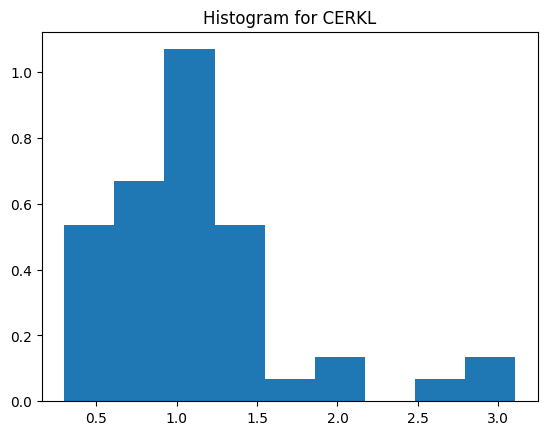

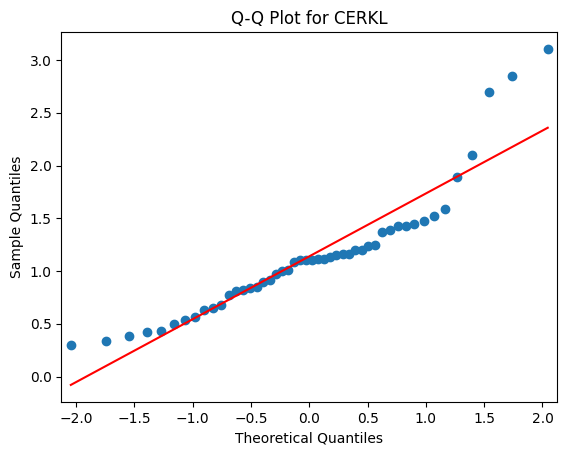

In [16]:
# Plot a histograms

plt.hist(CERKL, bins='auto', density=True)
plt.title(f"Histogram for CERKL")
plt.show()

# Plot a Q-Q plot
sm.qqplot(CERKL, line='s')
plt.title(f"Q-Q Plot for CERKL")
plt.show()

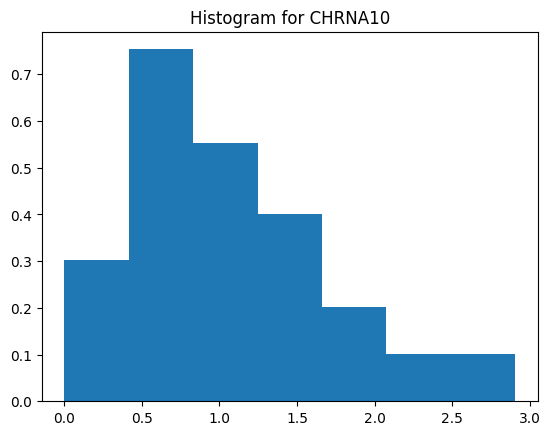

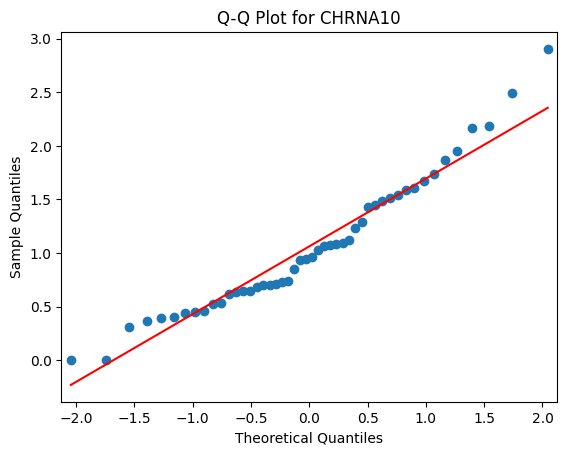

In [17]:
plt.hist(CHRNA10, bins='auto', density=True)
plt.title(f"Histogram for CHRNA10")
plt.show()

# Plot a Q-Q plot
sm.qqplot(CHRNA10, line='s')
plt.title(f"Q-Q Plot for CHRNA10")
plt.show()

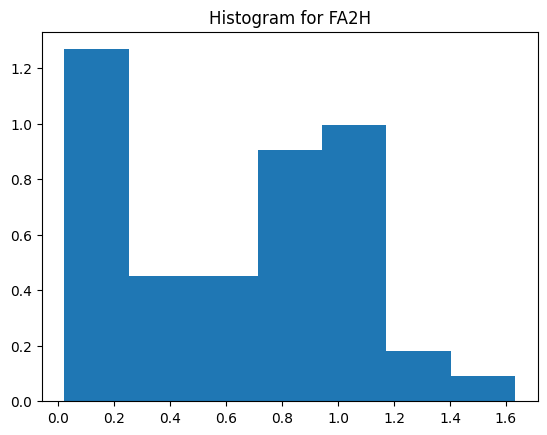

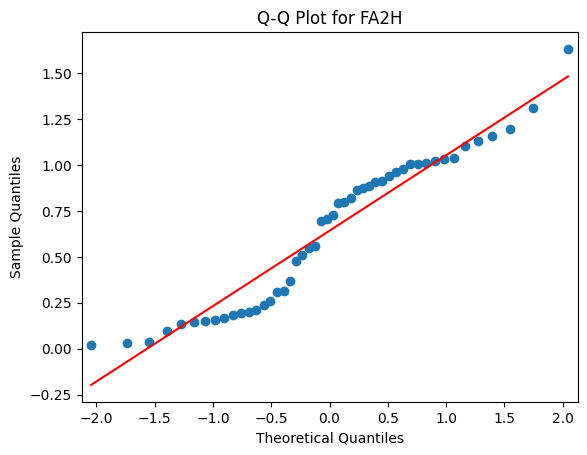

In [18]:
plt.hist(FA2H, bins='auto', density=True)
plt.title(f"Histogram for FA2H")
plt.show()

# Plot a Q-Q plot
sm.qqplot(FA2H, line='s')
plt.title(f"Q-Q Plot for FA2H")
plt.show()

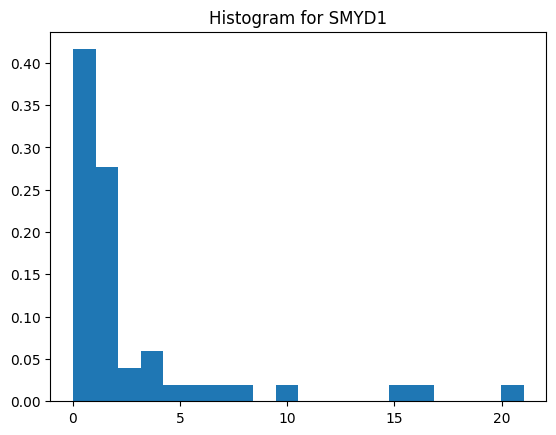

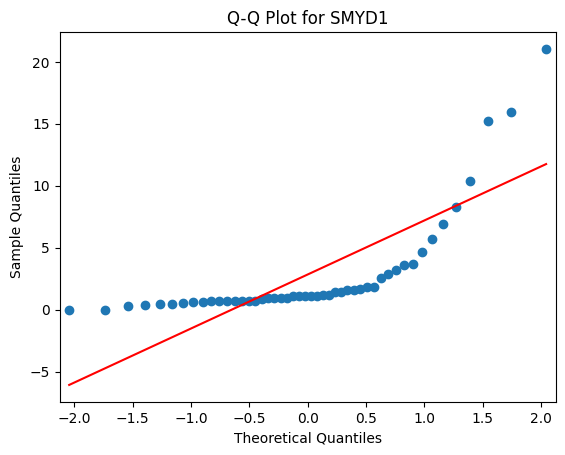

In [19]:
plt.hist(SMYD1, bins='auto', density=True)
plt.title(f"Histogram for SMYD1")
plt.show()

# Plot a Q-Q plot
sm.qqplot(SMYD1, line='s')
plt.title(f"Q-Q Plot for SMYD1")
plt.show()

# DATANORMALIZATION

In [21]:
##MINMAX METHOD OF NORMALIZATION
# Create an instance of the MinMaxScaler
#scaler = MinMaxScaler()

# Fit and transform your data
#normalized_data = scaler.fit_transform(CERKL)



# Z SCORE INDIVIDUALLY >>> Calculate mean and standard deviation
mean_CERKL = np.mean(CERKL)
std_CERKL = np.std(CERKL)

# Perform Z-score standardization
CERKL_std = (CERKL - mean_CERKL) / std_CERKL

#CERKL_std

In [22]:
#SHOWING JUST THE DATA THAT WILL BE USED BUT IS NOT YET NORMAL
qPCR_clean_columns = qPCR_clean[["CERKL","CHRNA10","FA2H","SMYD1"]]
qPCR_clean_columns

,CERKL,CHRNA10,FA2H,SMYD1
0,3.105000,2.4950,0.239,0.381
1,0.500000,0.7030,0.314,0.831
2,1.891000,1.5140,0.212,1.414
3,2.850000,0.7390,0.370,3.705
4,0.847000,0.4600,0.155,1.791
5,0.340000,1.0800,0.185,4.659
6,1.589000,1.4900,0.962,1.868
7,0.428000,1.0690,0.876,2.905
8,1.526000,1.4480,0.310,1.573
9,1.106000,0.9370,0.558,3.234


# Z SCORE NORMALIZATION OF DATAFRAME

In [23]:
##Z SCORE NORMALIZATION OF DATAFRAME

# Create an empty DataFrame to store the standardized data
standardized_df = pd.DataFrame()

#for column_name in columns_to_test:
#    if column_name in qPCR_clean.columns:
#        column_data = qPCR_clean[column_name]
#        statistic, p_value = stats.shapiro(column_data)
        
for column_name in columns_to_test:
    column_data = qPCR_clean[column_name]
    
    # Calculate mean and standard deviation for the current column
    mean = np.mean(column_data)
    std = np.std(column_data)
    
    # Perform Z-score standardization for the current column
    standardized_column = (column_data - mean) / std
    
    # Add the standardized column to the new DataFrame
    standardized_df[column_name] = standardized_column

# standardized_df now contains the Z-score standardized data for all columns

standardized_df

,CERKL,CHRNA10,FA2H,SMYD1
0,3.299306,2.266005,-0.983029,-0.563747
1,-1.072560,-0.568033,-0.800470,-0.460456
2,1.261899,0.714559,-1.048750,-0.326637
3,2.871350,-0.511099,-0.664159,0.199227
4,-0.490204,-0.952336,-1.187495,-0.240103
5,-1.341081,0.028190,-1.114471,0.418203
6,0.755065,0.676603,0.776839,-0.222429
7,-1.193394,0.010794,0.567505,0.015599
8,0.649335,0.610180,-0.810207,-0.290141
9,-0.055534,-0.197964,-0.206545,0.091116


In [24]:
# Create a list to store the results for each column
stdresults = []

# Iterate through the columns
for column_name_std in standardized_df.columns:
    column_data_std = standardized_df[column_name_std]

    # Perform the Shapiro-Wilk test for normality
    statistic_std, p_value_std = stats.shapiro(column_data_std)

    # Determine normality based on the p-value
    if p_value_std <= alpha:
        normality_std = "**NOT** normally distributed"
    else:
        normality_std = "Normally Distributed"

        
    # Store the result for the current column
    stdresults.append({
        "Column Name": column_name_std,
        "Test Statistic": statistic_std,
        "P-value": p_value_std,
        "Normality": normality_std
    })

# Create a DataFrame from the results
stdresults_df = pd.DataFrame(stdresults)

# Print or save the results as needed
stdresults_df

,Column Name,Test Statistic,P-value,Normality
0,CERKL,0.872645,9.202950e-05,**NOT** normally distributed
1,CHRNA10,0.952190,4.890707e-02,**NOT** normally distributed
2,FA2H,0.930193,6.931424e-03,**NOT** normally distributed
3,SMYD1,0.589235,2.312361e-10,**NOT** normally distributed


In [25]:
cerkl_std = standardized_df['CERKL']

statistic, p_value = stats.shapiro(cerkl_std)

# Set the significance level (alpha)
alpha = 0.05

# Check if the p-value is less than alpha to determine normality
if p_value <= alpha:
    normality = "**NOT** normally distributed"
else:
    normality = "Normally Distributed"
    
    

In [26]:
CERKL_std = standardized_df['CERKL']
CHRNA10_std = standardized_df['CHRNA10']
FA2H_std = standardized_df['FA2H']
SMYD1_std = standardized_df['SMYD1']

In [27]:
CERKL_std_stats = stats.shapiro(CERKL_std)
CHRNA10_std_stats = stats.shapiro(CHRNA10_std)
FA2H_std_stats = stats.shapiro(FA2H_std)
SMYD1_std_stats = stats.shapiro(SMYD1_std)

std_results_df = pd.DataFrame([CERKL_std_stats,CHRNA10_std_stats,FA2H_std_stats,SMYD1_std_stats])

#std_results_df.append({
#            "Column Name": column_name,
#            "Test Statistic": statistic,
#            "P-value": p_value,
#            "Normality": normality
#        })
    
std_results_df

,statistic,pvalue
0,0.872645,9.202950e-05
1,0.952190,4.890707e-02
2,0.930193,6.931424e-03
3,0.589235,2.312361e-10


In [28]:
results_df

,Column Name,Test Statistic,P-value,Normality
0,CERKL,0.872645,9.202950e-05,Not Normally Distributed
1,CHRNA10,0.952190,4.890779e-02,Not Normally Distributed
2,FA2H,0.930194,6.931502e-03,Not Normally Distributed
3,SMYD1,0.589235,2.312368e-10,Not Normally Distributed
